# Orbital spacing distribution fit
*Parse table from csv file*

In [5]:
from pandas import read_csv


df = read_csv('orbital_spacing.csv')
df.head()

,mass,type,temp,l_min,l_max,m_span,s_span,g_span
0,2.0,A5,8200,16.0,20.0,1.3,0.2,0.1
1,1.9,A6,8000,13.0,16.0,1.5,0.2,0.1
2,1.8,A7,7800,11.0,13.0,1.8,0.3,0.2
3,1.7,A9,7500,8.6,10.0,2.1,0.3,0.2
4,1.6,F0,7300,6.7,8.2,2.5,0.4,0.2


## Discrete probabilities
*the p column contains probability of the dice rolls corresponding to the ratios*

In [ ]:
x = df.ratio
y = df.p

y.sum()

1.0

*creating random sample of 1000 elements from given probabilities*

In [ ]:
from random import choices

sample = choices(list(x), weights=list(y), k=1000)


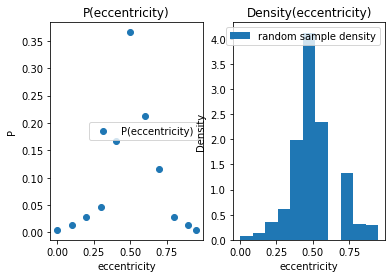

In [ ]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(ratio)")
axs[0].plot(x, y, 'o', label='P(ratio)')
axs[0].set_xlabel('ratio')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(ratio)")
axs[1].hist(sample, density=True, bins=len(x), label='random sample density')
axs[1].set_xlabel('ratio')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.show()

## Continuous random variable fit
*Fitting a truncated normal distribution to the random sample*

In [ ]:

import numpy as np

xa, xb = x.min(), x.max()
mu = np.mean(sample)
sigma = np.std(sample)
a, b = (xa - mu) / sigma, (xb - mu) / sigma

a, b, mu, sigma 

(-3.399018037073625,
 2.840122403888491,
 0.5175500000000001,
 0.15226456416382636)

In [ ]:
from scipy.stats import truncnorm
from scipy.stats import kstest

dist = truncnorm(a, b, mu, sigma)
r = kstest(sample, [a, b, mu, sigma], 'truncnorm')
r

KstestResult(statistic=0.482, pvalue=0.22261436530807233)

*Density function from the fitted continuous random variable*

In [ ]:
y_pdf =  [dist.pdf(xi) for xi in x]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [ ]:
fit_sample = dist.rvs(size=1000)

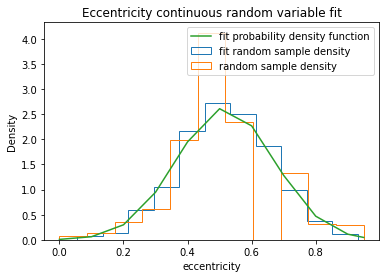

In [ ]:
_, ax = plt.subplots()
ax.set_title(r"Ratio continuous random variable fit")
ax.hist(fit_sample, density=True, histtype='step', bins=len(x), label='fit random sample density')
ax.hist(sample, density=True, histtype='step', bins=len(x), label='random sample density')
ax.plot(x, y_pdf, '-', label='fit probability density function')
ax.set_xlabel('ratio')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [1.4, 2]*

In [ ]:
all(v >= x.min() and v <= x.max() for v in fit_sample)

True